In [1]:
#imports
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import pathlib

In [2]:
class_names = ['NonDemented', 'Demented']
num_classes = len(class_names)
batch_size = 64
input_shape = (208, 176, 3)
AUTOTUNE = tf.data.experimental.AUTOTUNE

def one_hot_label(image, label):
    label = tf.one_hot(label, num_classes)
    return image, label

Found 5121 files belonging to 2 classes.
Found 1279 files belonging to 2 classes.


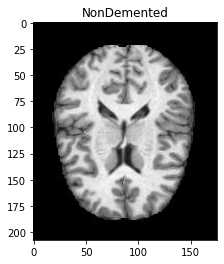

In [3]:
train_dir = pathlib.Path('../Project/Alzheimer_s Dataset_binary/train')
test_dir = pathlib.Path('../Project/Alzheimer_s Dataset_binary/test')

train_dataset = tf.keras.utils.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        class_names=class_names,
        batch_size=batch_size,
        image_size=input_shape[0:2])

test_dataset = tf.keras.utils.image_dataset_from_directory(
        test_dir,
        labels='inferred',
        class_names=class_names,
        batch_size=batch_size,
        image_size=input_shape[0:2])

for images, labels, in train_dataset.take(1):
    plt.imshow(images[0].numpy().astype('uint8'))
    plt.title(class_names[labels[0]])
    
train_dataset = train_dataset.map(one_hot_label, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.map(one_hot_label, num_parallel_calls=AUTOTUNE)

In [4]:
vgg = keras.applications.VGG16(
        include_top=False,
        input_shape=input_shape,
        pooling=max)

vgg.trainable = False

model = keras.models.Sequential([
    vgg,
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 5, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 15360)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              62918656  
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 8194      
Total params: 94,422,850
Trainable params: 79,708,162
Non-trainable params: 14,714,688
_________________________________________________________________


In [5]:
epochs = 30
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
              metrics=["accuracy"])

history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)

Epoch 1/30
81/81 [==============================] - 41s 383ms/step - loss: 5.1180 - accuracy: 0.6362 - val_loss: 1.0257 - val_accuracy: 0.6763
Epoch 2/30
81/81 [==============================] - 24s 294ms/step - loss: 0.6327 - accuracy: 0.7547 - val_loss: 0.8549 - val_accuracy: 0.7170
Epoch 3/30
81/81 [==============================] - 24s 299ms/step - loss: 0.3923 - accuracy: 0.8481 - val_loss: 0.7759 - val_accuracy: 0.7381
Epoch 4/30
81/81 [==============================] - 24s 295ms/step - loss: 0.2835 - accuracy: 0.8983 - val_loss: 1.8956 - val_accuracy: 0.6638
Epoch 5/30
81/81 [==============================] - 24s 295ms/step - loss: 0.1854 - accuracy: 0.9459 - val_loss: 1.2876 - val_accuracy: 0.7099
Epoch 6/30
81/81 [==============================] - 24s 295ms/step - loss: 0.2622 - accuracy: 0.9434 - val_loss: 1.0609 - val_accuracy: 0.7670
Epoch 7/30
81/81 [==============================] - 24s 295ms/step - loss: 0.1889 - accuracy: 0.9654 - val_loss: 1.2252 - val_accuracy: 0.7615

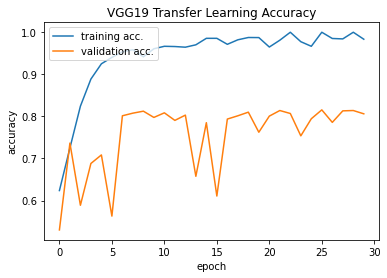

In [9]:
plt.title('VGG16 Transfer Learning Accuracy')

plt.plot(history.history['accuracy'], label = "training acc.")
plt.plot(history.history['val_accuracy'], label = "validation acc.")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training acc.', 'validation acc.'], loc='upper left')

plt.savefig("../Project/Result/VGG16_MODEL_ACCURACY")
plt.show()
